# Coffee survey data - Demografie und Kaffeegewohnheiten

**Projektschritt 2: Deskriptive Statistik & Visualisierung mit pandas, numpy, matplotlib und seaborn** 
Häufigkeiten z.B. von verschiedenen Kaffeezubereitungsarten, durchschnittliche Angaben z.B. zu Ausgaben für Kaffee, Verteilungen nach Alter, Geschlecht, Herkunft


## Load data and modules

In [1]:
# Import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# Load prepared data

df = pd.read_pickle("coffee_data.pkl")


## Demografie der Teilnehmenden an der Kaffee-Umfrage


In [4]:
# Spalten mit demografischen Variablen
dem_cols = ["age", "gender", "education_level", "ethnicity_race", "employment_status", "wfh", "number_children", "political_affiliation"]

# Datensatz mit relevanten Daten kreieren
df_dem = df[["submission_id"] + dem_cols].copy()
df_dem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   submission_id          4042 non-null   category
 1   age                    4011 non-null   category
 2   gender                 3523 non-null   category
 3   education_level        3438 non-null   category
 4   ethnicity_race         3418 non-null   category
 5   employment_status      3419 non-null   category
 6   wfh                    3524 non-null   category
 7   number_children        856 non-null    category
 8   political_affiliation  3289 non-null   category
dtypes: category(9)
memory usage: 71.5 KB


In [5]:
# Fehlende Werte
cols = ["age", "gender", "education_level", "ethnicity_race", "employment_status", "wfh", "political_affiliation"]

for col in cols:
    if 'keine Angabe' not in df_dem[col].cat.categories:
        df_dem[col] = df_dem[col].cat.add_categories("keine Angabe")
    df_dem[col] = df_dem[col].fillna("keine Angabe")

df_dem["number_children"] = df_dem["number_children"].cat.add_categories("keine/keine Angabe")
df_dem["number_children"] = df_dem["number_children"].fillna("keine/keine Angabe")
df_dem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   submission_id          4042 non-null   category
 1   age                    4042 non-null   category
 2   gender                 4042 non-null   category
 3   education_level        4042 non-null   category
 4   ethnicity_race         4042 non-null   category
 5   employment_status      4042 non-null   category
 6   wfh                    4042 non-null   category
 7   number_children        4042 non-null   category
 8   political_affiliation  4042 non-null   category
dtypes: category(9)
memory usage: 73.4 KB


In [6]:
# Werte in den einzelnen Kategorien zählen -> Frequenztabelle

def kategorien_zaehlen(df, kategorien=None):
    """
    Zählt absolute und relative Häufigkeiten (inkl. NaN) für kategorische Variablen.
    
    :param df: DataFrame
    :param kategorien: Liste von Spaltennamen (optional)
    :return: DataFrame mit Spalte, Kategorie, Anzahl, Prozent
    """
    if kategorien is None:
        kategorien = df.select_dtypes(include=["object", "category"]).columns

    ergebnisse = []

    for spalte in kategorien:
        # Absolute und relative Häufigkeit berechnen
        abs_werte = df[spalte].value_counts(dropna=False)
        rel_werte = df[spalte].value_counts(dropna=False, normalize=True)
        
        # Zusammenführen
        zusammen = pd.DataFrame({
            'Kategorie': abs_werte.index.astype(object).fillna('NaN'),
            'Anzahl': abs_werte.values,
            'Prozent': rel_werte.values*100
        })
        zusammen['Variable'] = spalte
        ergebnisse.append(zusammen)

    # Alles zusammenführen
    result = pd.concat(ergebnisse, ignore_index=True)
    return result[['Variable', 'Kategorie', 'Anzahl', 'Prozent']]


In [7]:
kategorien_zaehlen(df_dem, dem_cols)


,Variable,Kategorie,Anzahl,Prozent
0,age,25-34 years old,1986,49.134092
1,age,35-44 years old,960,23.750619
2,age,18-24 years old,461,11.405245
3,age,45-54 years old,302,7.471549
4,age,55-64 years old,187,4.626423
5,age,>65 years old,95,2.350322
6,age,keine Angabe,31,0.766947
7,age,<18 years old,20,0.494805
8,gender,Male,2524,62.444334
9,gender,Female,853,21.103414


### Visualisierung der demografischen Variablen

In [8]:
def plot_multiple_countplots(df, cols, figsize=None):
    
    """
    Funktion, um mehrere seaborn countplots in verschiedenen Subplots darzustellen.
    :param df: DataFrame
    :param cols: Liste von Spaltennamen
    :return: matplotlib figure
    """
    
    num_plots = len(cols)
    num_cols = 2
    num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols, figsize=figsize)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
            
        if num_rows == 1:
            if num_cols == 1:
                sns.countplot(x=df[col], ax=axs)
                axs.tick_params(axis='x', rotation=90)
                axs.set_title(col)
                plt.set_xlabel('')
            else:
                sns.countplot(x=df[col], ax=axs[j])
                axs[j].tick_params(axis='x', rotation=90)
                axs[j].set_title(col)
                axs[j].set_xlabel('')
        else:
            sns.countplot(x=df[col], ax=axs[i, j])
            axs[i,j].tick_params(axis='x', rotation=90)
            axs[i, j].set_title(col)
            axs[i, j].set_xlabel('')

    plt.tight_layout(pad=0)
           

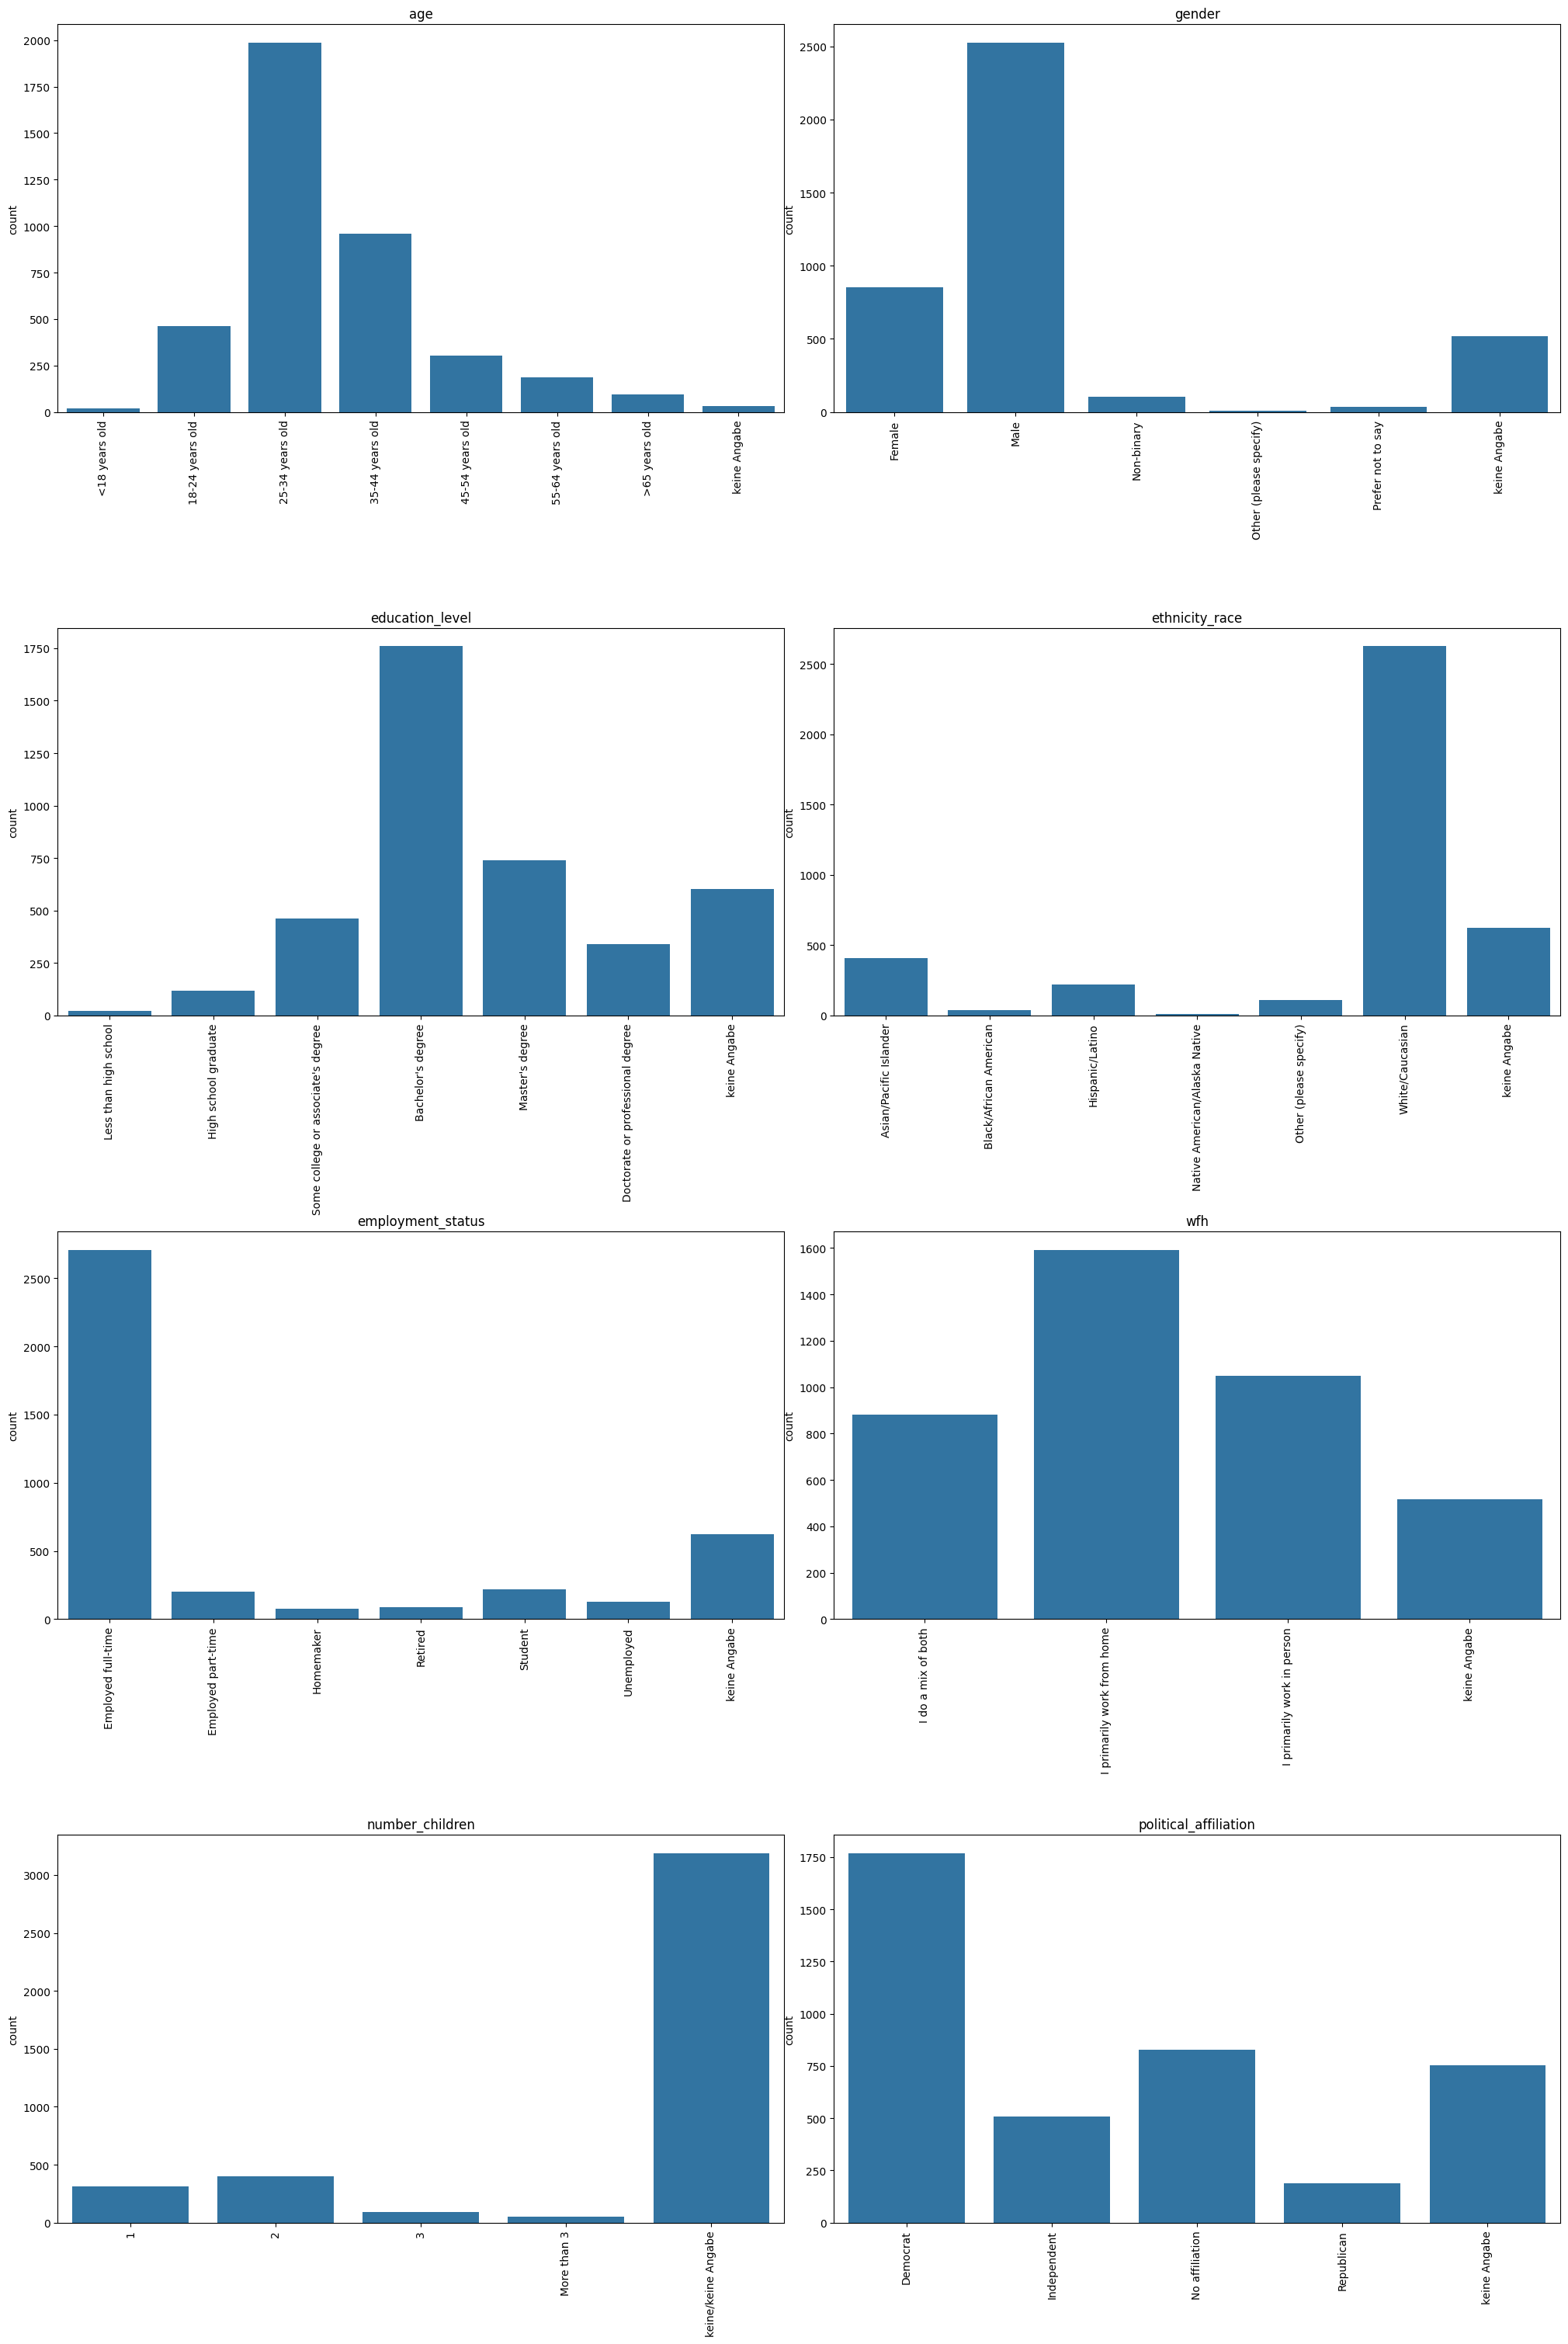

In [9]:
# plot histograms for demographic variables

plot_multiple_countplots(df_dem, dem_cols, figsize=(20,30))

Der Großteil der Teilnehmenden an der Kaffeeumfrage ist zwischen 25 und 34 Jahre alt, männlich, 
White/Caucasian, hat einen Bachelor-Abschluss, arbeitet Vollzeit im Home-Office, hat keine Kinder
oder keine Angabe dazu gemacht und ist Demokrat. Bei den Schlussfolgerungen dieser explorativen 
Datenanalyse muss daher beachtet werden, diese Gruppe nicht unbedingt repräsentativ ist und
sich die Ergebnisse nicht unbedingt auf andere Gruppen übertragen lassen. Außerdem ist zu beachten,
dass bei jeder Frage etwa 15% keine Angaben gemacht haben.

## Beschreibung Kaffee-spezifischer Variablen


In [12]:
habits = ["expertise", "cups", "caffeine", "taste", "know_source"]
cof = ["strength", "roast_level", "style", "favorite"]  
purch = ["total_spend", "most_paid", "most_willing", "value_cafe", "spent_equipment", "value_equipment"] 

df_cof = df[["submission_id"] + habits + cof + purch].copy()
df_cof.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   submission_id    4042 non-null   category
 1   expertise        3938 non-null   category
 2   cups             3949 non-null   category
 3   caffeine         3917 non-null   category
 4   taste            3563 non-null   category
 5   know_source      3559 non-null   category
 6   strength         3916 non-null   category
 7   roast_level      3940 non-null   category
 8   style            3958 non-null   category
 9   favorite         3980 non-null   category
 10  total_spend      3511 non-null   category
 11  most_paid        3527 non-null   category
 12  most_willing     3510 non-null   category
 13  value_cafe       3500 non-null   category
 14  spent_equipment  3506 non-null   category
 15  value_equipment  3494 non-null   category
dtypes: category(16)
memory usage: 102.3 KB


In [13]:
# Fehlende Werte
cols = df_cof.columns[1:]

for col in cols:
    if 'keine Angabe' not in df_cof[col].cat.categories:
        df_cof[col] = df_cof[col].cat.add_categories("keine Angabe")
    df_cof[col] = df_cof[col].fillna("keine Angabe")

df_cof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   submission_id    4042 non-null   category
 1   expertise        4042 non-null   category
 2   cups             4042 non-null   category
 3   caffeine         4042 non-null   category
 4   taste            4042 non-null   category
 5   know_source      4042 non-null   category
 6   strength         4042 non-null   category
 7   roast_level      4042 non-null   category
 8   style            4042 non-null   category
 9   favorite         4042 non-null   category
 10  total_spend      4042 non-null   category
 11  most_paid        4042 non-null   category
 12  most_willing     4042 non-null   category
 13  value_cafe       4042 non-null   category
 14  spent_equipment  4042 non-null   category
 15  value_equipment  4042 non-null   category
dtypes: category(16)
memory usage: 103.5 KB


## Kaffeegewohnheiten

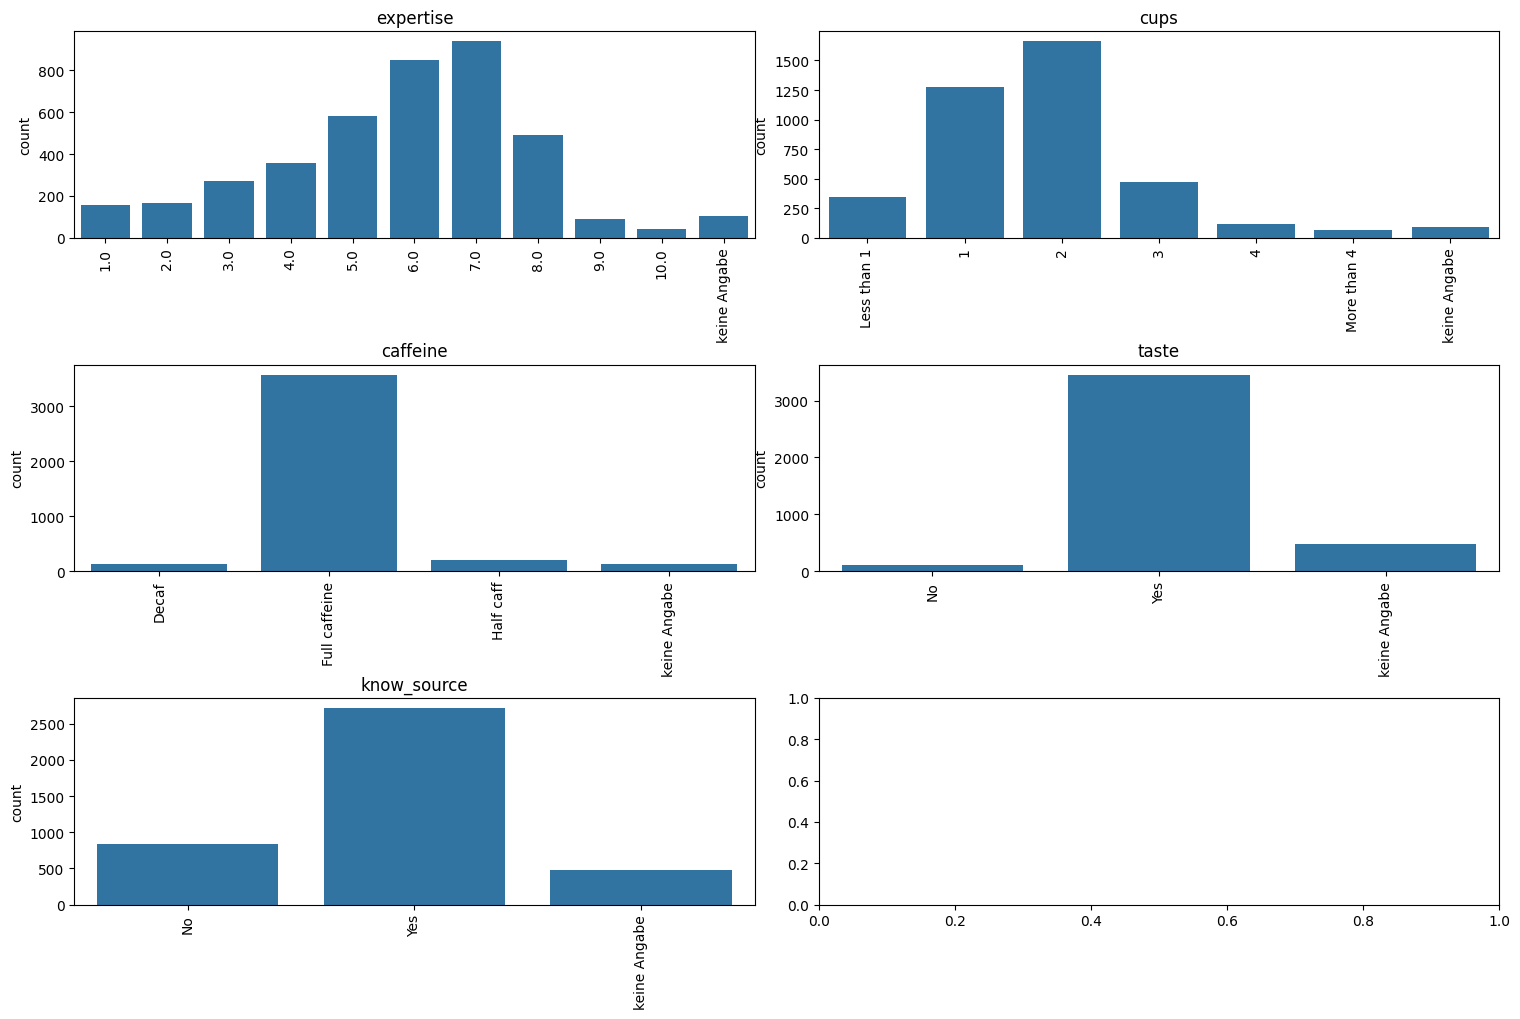

In [23]:
# plot histograms for variables describing coffee habits of the sample
plot_multiple_countplots(df_cof, habits, figsize=(15,10))

Die selbsteingeschätzte Kaffee-Expertise der Teilnehmenden liegt im (oberen) Mittelfeld. Die meisten
trinken zwei Tassen Kaffee am Tag. Ein Großteil der Teilnehmenden trinkt den Kaffee schwarz, gefolgt vom Hinzufügen von Milch. 
Fast alle trinken den Kaffee mit Koffein und mögen auch den Geschmack. Ein Großteil der Teilnehmenden kennt die Herkunft 
seines/ihres Kaffees. 

### Kaffeevorlieben

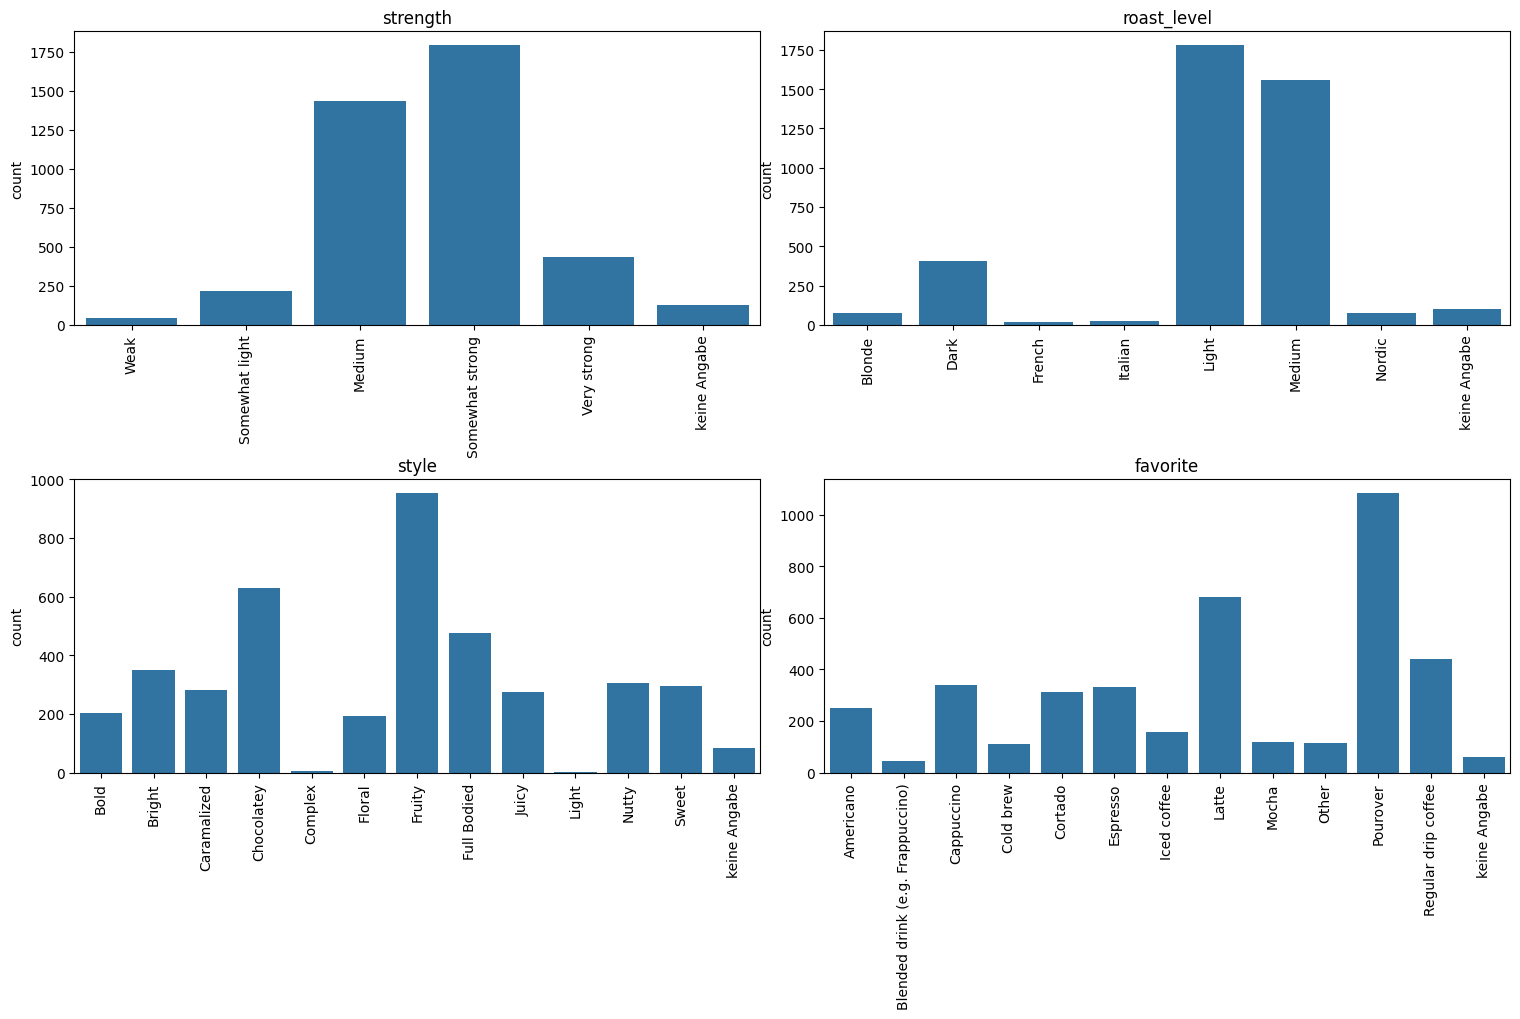

In [24]:
# plot coffee preferences of the sample
plot_multiple_countplots(df_cof, cof, figsize=(15,10))

Die meisten Teilnehmenden trinken ihren Kaffee gerne mittel- bis eher stark. Bei den weiteren Vorlieben
teilt die Gruppe sich auf in diejenigen, die Kaffee mit leichter Röstung mögen und diejenigen, die eine
mittlere Röstung bevorzugen. Das splittet sich im bevorzugten Geschmack weiter auf in fruchtigen, hellen, 
schokoladigen und vollmundigen Kaffee. Andere Geschmacksrichtungen kommen auch häufig vor, sodass sich 
hier vielfältige Geschmacksvorlieben in der Gruppe erkennen lassen. Das beliebteste Kaffeegetränk ist 
der Filterkaffee, gefolgt von Latte.

In [18]:
# Daten von Zubereitungsart vorbereiten

brew = df.columns[df.columns.str.startswith('brew ')] 

df_brew = df[["submission_id"] + list(brew)].copy()

# Spalte hinzufügen wenn nichts angegeben wurde
df_brew["brew keine Angabe"] = ~df_brew[brew].any(axis=1)
df_brew["brew keine Angabe"].sum()

np.int64(385)

In [20]:
df_cat = df_brew[list(brew) + ["brew keine Angabe"]].sum().reset_index()
df_cat.columns = ["Zubereitung", "Anzahl"]
df_cat["Zubereitung"] = df_cat["Zubereitung"].str.replace("brew ", "")
df_cat

,Zubereitung,Anzahl
0,Bean-to-cup machine,84
1,Coffee brewing machine (e.g. Mr. Coffee),663
2,Coffee extract (e.g. Cometeer),186
3,Cold brew,525
4,Espresso,1518
5,French press,735
6,Instant coffee,130
7,Other,677
8,Pod/capsule machine (e.g. Keurig/Nespresso),336
9,Pour over,2295


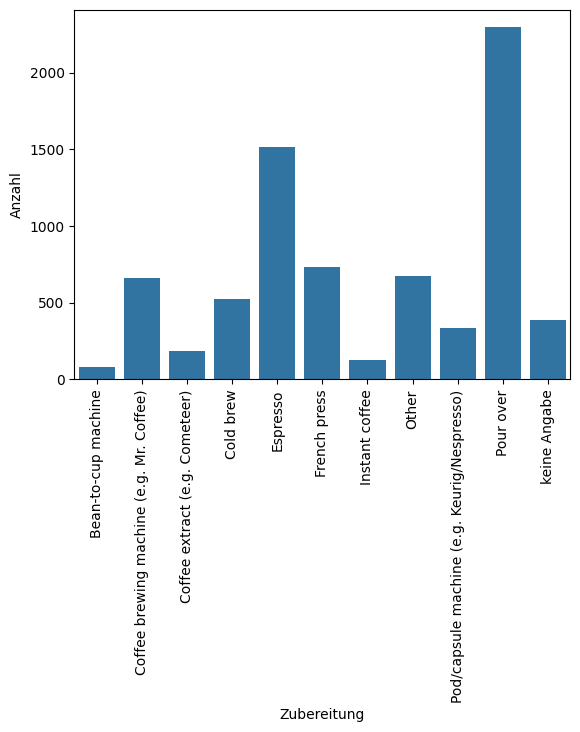

In [21]:
fig = sns.barplot(df_cat, x="Zubereitung", y="Anzahl")
fig.tick_params(axis='x', rotation=90)
plt.show()
                

### Kaufverhalten

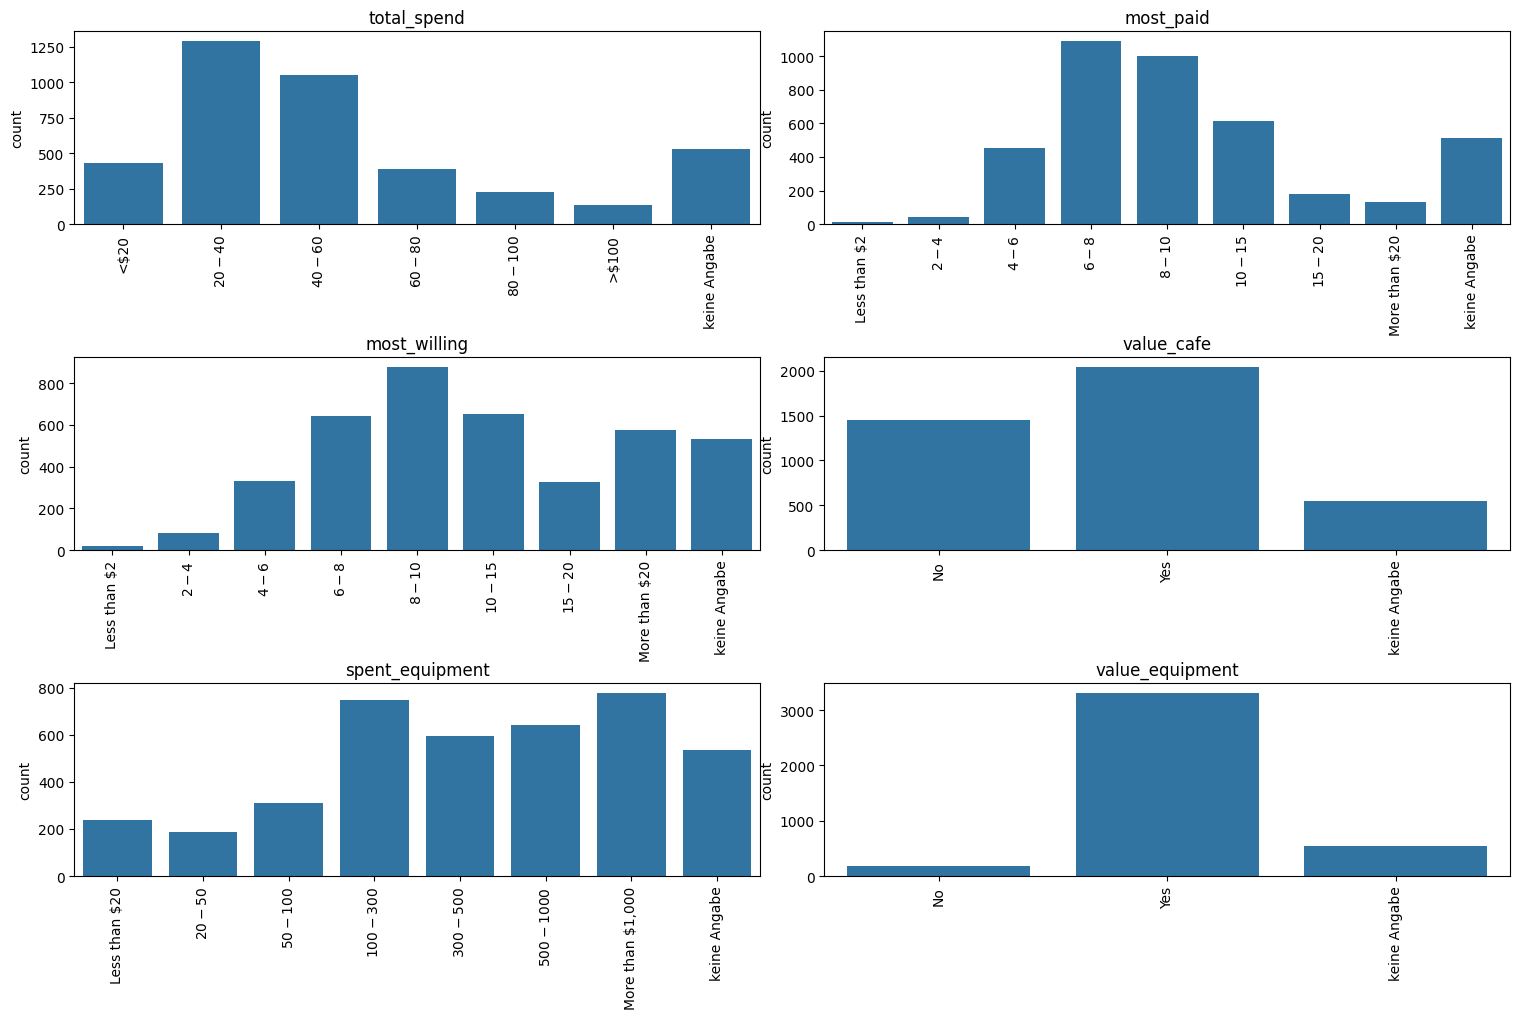

In [25]:
# plot purchase behavior regarding coffee of the sample
plot_multiple_countplots(df_cof, purch, figsize=(15,10))

Die meisten Teilnehmenden geben 20-40 Dollar im Monat für Kaffee aus, viele sogar 40-60 Dollar. Für
eine Tasse Kaffee im Café haben die meisten bis zu 6-8 oder 8-10 Dollar bezahlt. Acht bis 10 Dollar ist
auch der Preis, den die meisten maximal bereit sind für eine Tassee Kaffee zu bezahlen. Bei der Frage, 
ob man findet, dass man im Café guten Kaffee für sein Geld bekommt, scheiden sich die Meinungen - die
meisten finden zwar "ja", viele antworten jedoch auch mit "nein". Für Kaffee-Equpiment haben die meisten
in den letzten fünf Jahren 100-300 Dollar oder mehr ausgegeben - viele sogar mehr als 1000 Dollar. Das
Geld scheint gut investiert zu sein - fast alle finden, dass sie beim Equipment ein gutes Preis-Leistungs-
Verhältnis bekommen. 

## Datensatz speichern
Einige Variablen eignen sich nicht für weitere Analysen, da es nur wenig Variation in den Antworten gibt. Deshalb wird ein neuer Datensatz nur mit relevanten und geeigneten Variablen erstellt, deren Zusammenhang mit Kaffeebewertungen im nächsten Schritt untersucht werden soll.

In [ ]:
df_dem = df_dem[["submission_id", "age", "gender"]]
df_cof = df_cof[["submission_id", "expertise", "strength", "roast_level", "style", "favorite"]]

In [36]:
df = pd.merge(df_dem, df_cof, on='submission_id', how='outer')
df = pd.merge(df, df_brew, on='submission_id', how='outer')
df.info()
df.to_pickle('coffee_data_descriptives.pkl')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 19 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   submission_id                                     4042 non-null   category
 1   age                                               4042 non-null   category
 2   gender                                            4042 non-null   category
 3   expertise                                         4042 non-null   category
 4   strength                                          4042 non-null   category
 5   roast_level                                       4042 non-null   category
 6   style                                             4042 non-null   category
 7   favorite                                          4042 non-null   category
 8   brew Bean-to-cup machine                          4042 non-null   bool    
 9   brew Cof